Función Sinusoidal

In [3]:
from pydub import AudioSegment
import numpy as np
notas={
"C": 261.63,
"D": 293.66,
"E": 329.63,
"F": 349.23,
"G": 392.00,
"A": 440.00,
"B": 493.88,
'T':0.00
}
notas_cancion=np.array([
    'C','C','D','C','F','E','T','C','C','D','C','G','F'
])
#2seg para el T
#C C D C F E   C C D C G F
#C C D C F E   C C D C G F
#C C C' A F E D   A A G F D E
#D D C C G F E C C D C G F
def generate_audio(duration=13, frequency=440, volume=50):
    # Crear un array de numpy con los valores de la onda sinusoidal
    muestreo=44100
    numeros_duracion=np.arange(muestreo*duration)
    samples=[]
    for num in numeros_duracion:
        if num%muestreo==0:
            frequency=notas[notas_cancion[num//muestreo]]
        value=np.sin(2 * np.pi * frequency * num/ muestreo)
        
        samples.append(value)
    samples=np.array(samples).astype(np.float32)

    print('Samples ',samples, samples.shape, samples.size)
    # Escalar los valores para ajustar el volumen
    scaled_samples = (samples * (10 ** (volume / 20))).astype(np.float32)
    print('Scaled samples ',scaled_samples ,scaled_samples.shape, scaled_samples.size)
    return scaled_samples,numeros_duracion/44100
    # Crear un objeto AudioSegment a partir de los datos de audio
    #audio = AudioSegment(
    #    scaled_samples.tobytes(),
    #    frame_rate=muestreo,
    #    sample_width=scaled_samples.dtype.itemsize,
    #    channels=1
    #)
#
    #return audio

# Generar audio de 5 segundos con una frecuencia de 440 Hz y guardar como archivo MP3
#audio = generate_audio(duration=len(notas_cancion))
#audio.export("output.mp3", format="mp3")
#
#print("¡Archivo de audio generado correctamente!")

Samples  [ 0.          0.03726733  0.07448287 ... -0.21051563 -0.16163334
 -0.11235098] (573300,) 573300
Scaled samples  [  0.        11.784964  23.55355  ... -66.570885 -51.11295  -35.528496] (573300,) 573300


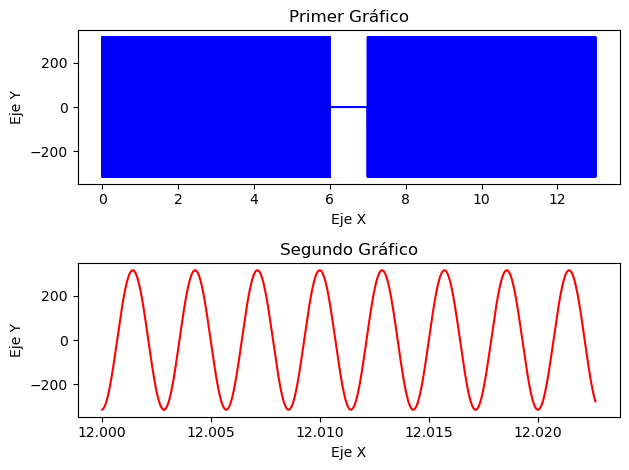

In [73]:
import matplotlib.pyplot as plt
audio_samples,tiempo=generate_audio(duration=len(notas_cancion))

fig, (pt_1, pt_2) = plt.subplots(2)

# Trazar el primer gráfico en el primer eje
pt_1.plot(tiempo, audio_samples, color='blue')
pt_1.set_title('Primer Gráfico')
pt_1.set_xlabel('Eje X')
pt_1.set_ylabel('Eje Y')

# Trazar el segundo gráfico en el segundo eje
pt_2.plot(tiempo[44100*12:44100*12+1000], audio_samples[44100*12:44100*12+1000], color='red')
pt_2.set_title('Segundo Gráfico')
pt_2.set_xlabel('Eje X')
pt_2.set_ylabel('Eje Y')

# Ajustar el diseño de la figura para evitar solapamientos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

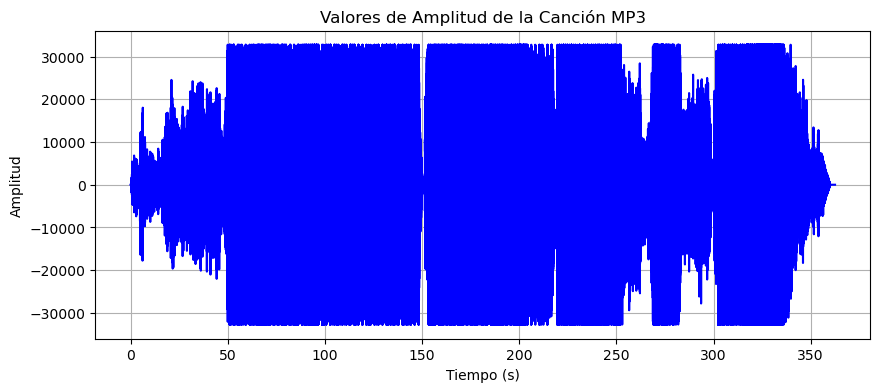

In [5]:
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt

# Cargar la canción MP3
audio_file = "audio_muestra.mp3"
audio = AudioSegment.from_mp3(audio_file)

# Obtener los datos de audio como una matriz NumPy
samples = np.array(audio.get_array_of_samples())

# Calcular la duración total de la canción en segundos
duration = len(samples) / audio.frame_rate

# Crear un arreglo de tiempo para el eje X
time = np.linspace(0, duration, len(samples))
one_seg=audio.frame_rate
# Graficar los valores de amplitud en función del tiempo
plt.figure(figsize=(10, 4))
plt.plot(time, samples, color='blue')
plt.title('Valores de Amplitud de la Canción MP3')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

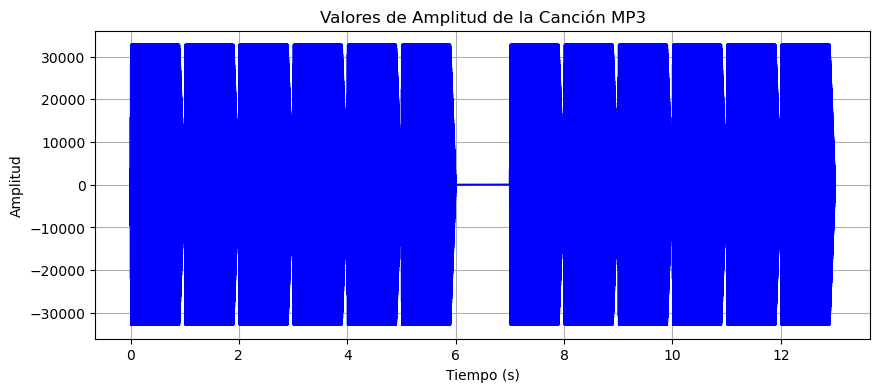

Cancion  [     0      2     11 ... -31336 -30957 -30536]


<_io.BufferedRandom name='cancion_hb_mejorada.wav'>

In [6]:
from pydub.generators import Sine
from pydub import AudioSegment
notas_musicales = {
    'C': 261.63,
    'C#': 277.18,
    'D': 293.66,
    'D#': 311.13,
    'E': 329.63,
    'F': 349.23,
    'F#': 369.99,
    'G': 392.00,
    'G#': 415.30,
    'A': 440.00,
    'A#': 466.16,
    'B': 493.88,
    'T':0.00
}
# Definir las frecuencias de las notas en Hz
frecuencia_do = 261.63
frecuencia_re = 293.66
frecuencia_mi = 329.63
notas_cancion=np.array([
    'C','C','D','C','F','E','T','C','C','D','C','G','F'
])
# Duración del sonido en milisegundos
duracion = 1000  # 1 segundo
cancion=AudioSegment.empty()
for nota in notas_cancion:
    #if nota=='T':
    #    duracion=duracion*2
    #else:
    #    duracion=duracion*1.5
    sonido=Sine(notas[nota]).to_audio_segment(duration=duracion)
    sonido=sonido.fade_in(10).fade_out(100)
    cancion+=sonido



# Concatenar los sonidos para obtener una secuencia de notas
samples=np.array(cancion.get_array_of_samples())
# Calcular la duración total de la canción en segundos
duration = len(samples) / cancion.frame_rate

# Crear un arreglo de tiempo para el eje X
time = np.linspace(0, duration, len(samples))
one_seg=audio.frame_rate
# Graficar los valores de amplitud en función del tiempo
plt.figure(figsize=(10, 4))
plt.plot(time, samples, color='blue')
plt.title('Valores de Amplitud de la Canción MP3')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()
print('Cancion ',samples[:int(one_seg/2)])
# Guardar la secuencia de notas en un archivo de audio
cancion.export("cancion_hb_mejorada.wav", format="wav")

# Reproducir la secuencia de notas
#cancion.play()

Agrupando notas en cancion

In [4]:
from sklearn.cluster import KMeans

def k_means_fit(x,z0,nitermax):
    kmeans=KMeans(n_clusters=len(z0), init=z0, max_iter=nitermax)
    kmeans.fit(x)
    labels=kmeans.labels_
    centroids=kmeans.cluster_centers_
    return labels, centroids

Samples notas musicales [ 0  2 11 ...  0  0  0] frame rate 44100
 Scaled samples [[  0   2  11 ... -15 -11  -6]
 [  0   2  11 ...  18  12   6]
 [  0   3  12 ... -18 -12  -7]
 ...
 [  0   4  19 ...  16  11   6]
 [  0   5  20 ... -19 -12  -6]
 [  0   0   0 ...   0   0   0]]


/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_2450/2216930813.py:37: RuntimeWarning: overflow encountered in scalar subtract
  x_scaled_min_max = (category - x_min) / (x_max - x_min)
/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_2450/2216930813.py:66: RuntimeWarning: overflow encountered in scalar subtract
  x_scaled_min_max = (sample - x_min) / (x_max - x_min)


x [[    0     0    -1 ... -1019   870  -854]
 [ 1016  -692  1132 ... -2907 -2026 -3103]
 [-1876 -3282 -1713 ...   271  1952   149]
 ...
 [ -132  -149  -260 ...    19    18    19]
 [   17    19    14 ...     0     0     0]
 [   -1    -1    -1 ...    -1     0     0]] shape (362, 44100) || z0 [[  0   2  11 ... -15 -11  -6]
 [  0   2  11 ...  18  12   6]
 [  0   3  12 ... -18 -12  -7]
 ...
 [  0   4  19 ...  16  11   6]
 [  0   5  20 ... -19 -12  -6]
 [  0   0   0 ...   0   0   0]] shape (13, 44100)
Centroids [[ -8334.         -14272.          -6540.         ... -13022.
  -16790.         -12166.        ]
 [ -8651.          -4866.          -6716.         ...  -2413.
   -5915.          -9290.        ]
 [-12099.         -11101.         -12935.         ...  18823.
   17944.          21268.        ]
 ...
 [-32768.         -32768.         -32768.         ...   8525.
   12377.           7871.        ]
 [ -7045.          -9236.          -7422.         ...   2307.
    4230.           4746.        ]

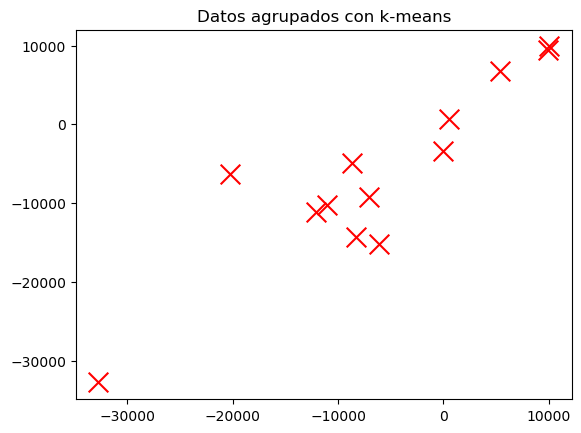

In [5]:
from pydub import AudioSegment
from pydub.generators import Sine
import numpy as np
import matplotlib.pyplot as plt
notas_musicales = {
    'C': 261.63,
    'C#': 277.18,
    'D': 293.66,
    'D#': 311.13,
    'E': 329.63,
    'F': 349.23,
    'F#': 369.99,
    'G': 392.00,
    'G#': 415.30,
    'A': 440.00,
    'A#': 466.16,
    'B': 493.88,
    'T':0.00
}
duracion_nota= 1000  # 1 segundo
lista_notas=AudioSegment.empty()
for nota in notas_musicales:
    sonido=Sine(notas_musicales[nota]).to_audio_segment(duration=duracion_nota)
    sonido=sonido.fade_in(10).fade_out(100)
    lista_notas+=sonido
samples_notas_musicales=np.array(lista_notas.get_array_of_samples())
notas_frame_rate=lista_notas.frame_rate
# Z-score Standardization

print(f'Samples notas musicales {samples_notas_musicales} frame rate {notas_frame_rate}')
categories=samples_notas_musicales.reshape(13,44100)
for category in categories:
    x_min = np.min(category)
    x_max = np.max(category)
    if x_max==x_min:
        x_max=x_min+1
    x_scaled_min_max = (category - x_min) / (x_max - x_min)
    category=x_scaled_min_max
print(f' Scaled samples {categories}')




# Cargar la canción MP3
audio_file = "audio_muestra.mp3"
audio = AudioSegment.from_mp3(audio_file)

# Obtener los datos de audio como una matriz NumPy
samples = np.array(audio.get_array_of_samples())


# Calcular la duración total de la canción en segundos
duration = len(samples) / audio.frame_rate
# x son los datos
# z0 son los representantes iniciales
# nitermax es el numeor maximo de iteraciones
duration=int(duration)
fourier_transform = np.fft.fft(samples)
frequencies = np.fft.fftfreq(len(samples), 1 / audio.frame_rate) 
x=samples[:44100*duration].reshape(duration,44100)
for sample in x:
    x_min = np.min(sample)
    x_max = np.max(sample)
    if x_max==x_min:
        x_max=x_min+1
    x_scaled_min_max = (sample - x_min) / (x_max - x_min)
    sample=x_scaled_min_max
z0=categories
nitermax=1000
print(f'x {x} shape {x.shape} || z0 {z0} shape {z0.shape}')
labels,centroids=k_means_fit(x,z0,nitermax)

print(f'Centroids {centroids}')
print(f'Labels {labels}')


plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200, label='Centroides')
plt.title('Datos agrupados con k-means')
plt.show()




Frecuencias [ 0.          0.00275855  0.00551709 ... -0.00827564 -0.00551709
 -0.00275855] len 15986688
Frecuencias [-1.79471136e+08       +0.j          6.28831612e+07+83027730.26411936j
 -2.24840857e+07-72162077.86677173j ...  1.06979319e+08+42666062.4749022j
 -2.24840857e+07+72162077.86677173j  6.28831612e+07-83027730.2641194j ] len 15986688


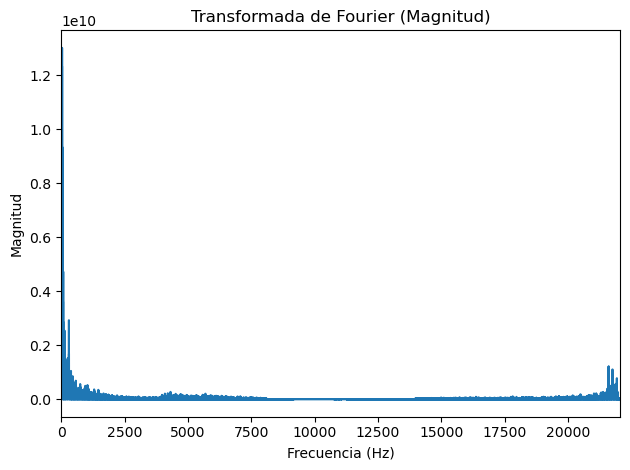

In [6]:
print(f'Frecuencias {frequencies} len {len(frequencies)}')
print(f'Frecuencias {fourier_transform} len {len(fourier_transform)}')
plt.subplot(1, 1,1)
plt.plot(frequencies, np.abs(fourier_transform))
plt.title('Transformada de Fourier (Magnitud)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim(0, 44100 / 2)  # Mostrar solo la mitad positiva del espectro de frecuencia
plt.tight_layout()
plt.show()


In [8]:
threshold = 1000  # Umbral para considerar un pico de frecuencia
peak_indices = np.where(np.abs(fourier_transform) > threshold)[0]
peak_frequencies = frequencies[peak_indices][:1000]
peak_magnitudes = np.abs(fourier_transform[peak_indices])

# Asignar notas musicales a los picos de frecuencia
notas_musicales = {
    'C': 261.63,
    'C#': 277.18,
    'D': 293.66,
    'D#': 311.13,
    'E': 329.63,
    'F': 349.23,
    'F#': 369.99,
    'G': 392.00,
    'G#': 415.30,
    'A': 440.00,
    'A#': 466.16,
    'B': 493.88
}

# Asociar cada pico de frecuencia con la nota musical más cercana
notas_detectadas = []
print("Picos de frecuencia:", peak_frequencies, len(peak_frequencies))
for freq in peak_frequencies:
    distancia_minima = float('inf')
    nota_detectada = None
    print("Nota detectada:", nota_detectada)
    for nota, freq_ref in notas_musicales.items():
        distancia = abs(freq - freq_ref)
        print("Distancia:", distancia)
        if distancia < distancia_minima:
            print('distancia es menor que distancia minima')
            distancia_minima = distancia
            nota_detectada = nota
    notas_detectadas.append(nota_detectada)
    print("Nota detectada:", nota_detectada)

# Mostrar las notas detectadas
print("Notas detectadas:", notas_detectadas)
print("Len Notas detectadas:", len(notas_detectadas))

Picos de frecuencia: [0.         0.00275855 0.00551709 0.00827564 0.01103418 0.01379273
 0.01655127 0.01930982 0.02206836 0.02482691 0.02758545 0.030344
 0.03310254 0.03586109 0.03861963 0.04137818 0.04413672 0.04689527
 0.04965381 0.05241236 0.0551709  0.05792945 0.06068799 0.06344654
 0.06620508 0.06896363 0.07172217 0.07448072 0.07723926 0.07999781
 0.08275635 0.0855149  0.08827344 0.09103199 0.09379053 0.09654908
 0.09930762 0.10206617 0.10482471 0.10758326 0.1103418  0.11310035
 0.11585889 0.11861744 0.12137598 0.12413453 0.12689308 0.12965162
 0.13241017 0.13516871 0.13792726 0.1406858  0.14344435 0.14620289
 0.14896144 0.15171998 0.15447853 0.15723707 0.15999562 0.16275416
 0.16551271 0.16827125 0.1710298  0.17378834 0.17654689 0.17930543
 0.18206398 0.18482252 0.18758107 0.19033961 0.19309816 0.1958567
 0.19861525 0.20137379 0.20413234 0.20689088 0.20964943 0.21240797
 0.21516652 0.21792506 0.22068361 0.22344215 0.2262007  0.22895924
 0.23171779 0.23447633 0.23723488 0.23999342